In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

In [3]:
df=pd.read_csv("forestfires.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


###### EDA
#FFMC- Fine Fuel moisture Code 
#DMC- Duff Moisture COde
#DC- Drougnt Code
#ISI- Initial Spread Index
#RH- Relative Humidity
#area- Burnt area of forest
df.dtypes

In [5]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [57]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [58]:

df['area'] = np.log1p(df['area']) 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [59]:
label_encoder = preprocessing.LabelEncoder()
df['month']= label_encoder.fit_transform(df['month']) 
df['day']= label_encoder.fit_transform(df['day']) 

In [60]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


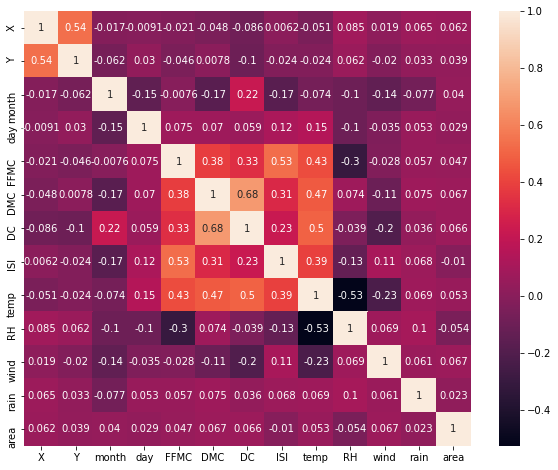

In [61]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True)
plt.show()

In [62]:
corr=df.corr()
corr["area"].nlargest(2)

area    1.000000
DMC     0.067153
Name: area, dtype: float64

In [63]:
corr["area"].nsmallest(2)

RH    -0.053662
ISI   -0.010347
Name: area, dtype: float64

<AxesSubplot:>

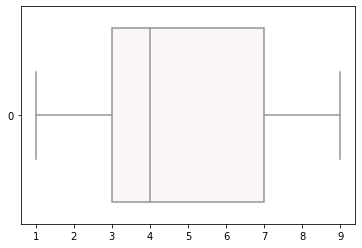

In [64]:

#as enginesize has highest correlation with price it is best independent variable

sns.boxplot(data=df["X"], palette="vlag",orient="h")

In [65]:
x = df.iloc[:, :-1]
y = df.iloc[:, [12]]

In [66]:
from sklearn.model_selection import train_test_split


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

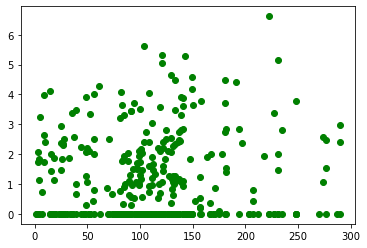

In [67]:
plt.scatter(X_train["DMC"], y_train, color = 'g')
plt.show()

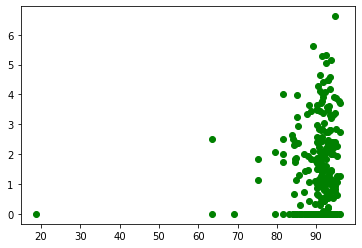

In [68]:
plt.scatter(X_train["FFMC"], y_train, color = 'g')
plt.show()

<AxesSubplot:>

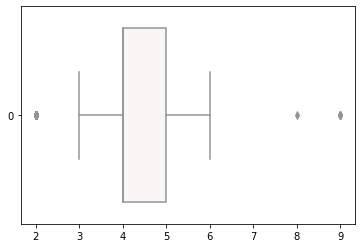

In [69]:
sns.boxplot(data=df["Y"], palette="vlag",orient="h")

# simple linear regression

In [70]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
lin_model = linear_model.LinearRegression()


In [72]:
model = lin_model.fit(X_train,y_train)
model

LinearRegression()

In [73]:
x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [74]:
y.head()

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [75]:
model.score(X_train, y_train)

0.02753294240260351

In [76]:
model.intercept_

array([0.41817988])

In [77]:
model.coef_

array([[ 6.05427043e-02, -2.00209030e-02, -4.05545368e-03,
         1.49353318e-02, -1.22328361e-03,  1.98197661e-03,
         5.00117778e-05, -9.12481916e-03,  9.89168098e-03,
        -1.26307990e-04,  6.80197827e-02, -1.99587432e+00]])

In [78]:
print('Linear Regression is Y = {}X + {}'.format(model.coef_, model.intercept_))

Linear Regression is Y = [[ 6.05427043e-02 -2.00209030e-02 -4.05545368e-03  1.49353318e-02
  -1.22328361e-03  1.98197661e-03  5.00117778e-05 -9.12481916e-03
   9.89168098e-03 -1.26307990e-04  6.80197827e-02 -1.99587432e+00]]X + [0.41817988]


In [79]:
y_pred = model.predict(X_test)
print('Actual price', y_test.head())
print('\nPredicted price', y_pred[:5])

Actual price          area
216  3.417071
111  0.000000
40   0.000000
72   0.000000
238  6.995620

Predicted price [[0.91789369]
 [0.85669254]
 [1.0988394 ]
 [1.06767602]
 [1.26566041]]


In [80]:
x.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


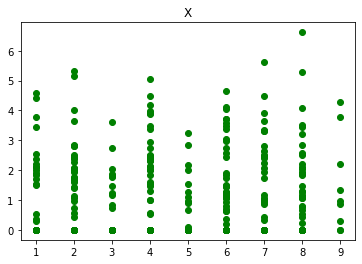

In [81]:
plt.title("X")
plt.scatter(X_train["X"], y_train, color = 'g')
plt.show()

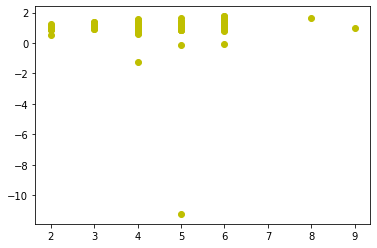

In [82]:
plt.scatter(X_test["Y"], y_pred, color = 'y')
plt.show()

In [83]:
r2 = r2_score(y_test, y_pred)
print('R2', round(r2*100,2), '%')

R2 -61.06 %


In [84]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 3.143039771763949
MAE: 1.2152721799494304
RMSE: 1.7728620284060317


In [85]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.405
Model:                            OLS   Adj. R-squared (uncentered):              0.390
Method:                 Least Squares   F-statistic:                              28.59
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                    1.45e-49
Time:                        16:23:14   Log-Likelihood:                         -899.15
No. Observations:                 517   AIC:                                      1822.
Df Residuals:                     505   BIC:                                      1873.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Randomforest regression

In [86]:

from sklearn.ensemble import RandomForestRegressor

R=RandomForestRegressor(n_estimators=100)


R.fit(X_train,y_train)

y_pred=R.predict(X_test)

<ipython-input-86-c9b5a72a2c06>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R.fit(X_train,y_train)


In [87]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

1.174083743170922
2.107727059541504
1.0835514492496061


In [88]:
#cross validation
from sklearn.model_selection import cross_val_score
all_output = cross_val_score(estimator = R, X = X_train, y = y_train, cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [89]:
print('Accuracies from all CV', all_output)

Accuracies from all CV [-0.13545516 -0.27512724 -0.49338106 -0.39919482 -0.20941349 -0.10961033
 -0.10459352 -0.2304876  -0.13465262 -0.38700002]


In [90]:
print('Overall Accuracy of this Model:', abs(all_output.mean()*100))

Overall Accuracy of this Model: 24.789158552994923


In [91]:
print('Actual price', y_test.head())
print('\nPredicted price\n', y_pred[:5])

Actual price          area
216  3.417071
111  0.000000
40   0.000000
72   0.000000
238  6.995620

Predicted price
 [0.85703956 1.00707575 1.22742319 0.88249268 1.06223947]


In [92]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

1.174083743170922
2.107727059541504
1.0835514492496061


In [93]:
#Random search cv

In [94]:
rf_pr = {'max_depth': [3,5,9], 'max_features': (1,2,3,4,5,6), 'min_samples_leaf' : (1,2,3,4,5,6,7,8)} 

In [95]:
from sklearn.model_selection import RandomizedSearchCV
gd_sr = RandomizedSearchCV(R, rf_pr, 5, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_iter=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [96]:
search = gd_sr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [97]:
search.best_params_

{'min_samples_leaf': 8, 'max_features': 1, 'max_depth': 3}

In [98]:
R=RandomForestRegressor(min_samples_leaf= 8, max_features= 1, max_depth= 3)


R.fit(X_train,y_train)

y_pred=R.predict(X_test)

<ipython-input-98-a59cb6dd4def>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R.fit(X_train,y_train)


In [99]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

1.1567479081850927
1.9523645792852347
1.0755221560642498
